In [31]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
from pprint import pprint

output_data_file = "WTI_Crude_Oil_Quarterly.csv"

In [8]:
# Create URL to retrieve data
url = "http://www.quandl.com/api/v3/datasets/CHRIS"
commodity = "CME_CL1"

In [13]:
# Build partial query URL
query_url = f"{url}/{commodity}?collapse=quarterly&api_key={api_key}"
print(query_url)

http://www.quandl.com/api/v3/datasets/CHRIS/CME_CL1?collapse=quarterly&api_key=tfzm67sBTei7BJAaUdbH


In [14]:
# Make request and store response
response = requests.get(query_url)

# Print status code
print(response.status_code) 

200


In [17]:
# Get commodity data
commodity_response = requests.get(query_url)
commodity_json = commodity_response.json()
response = requests.get(query_url).json()

date_list = [dates for dates in response["dataset"]["data"]]

In [18]:
# Create list to append data and loop through JSON dictionary 
dates_end = []
last_end = []
for dates in date_list:
    dates_end.append(dates[0])
    last_end.append(dates[4])
#print(dates_end)
#print(last_end)

In [25]:
# Create a data frame 
wti_dict = {
    "Dates": dates_end,
    "Last Price": last_end
}
wti_data = pd.DataFrame(wti_dict)
wti_data.head()

,Dates,Last Price
0,2018-12-31,62.86
1,2018-09-30,73.55
2,2018-06-30,74.29
3,2018-03-31,64.91
4,2017-12-31,60.10


In [26]:
# Calculate number of data point
wti_data.count()

Dates         144
Last Price    144
dtype: int64

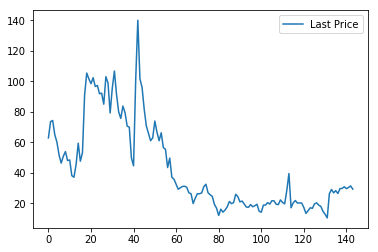

In [29]:
# Try to plot the data quick overview
wti_data.plot()
plt.show()

In [32]:
# Output data to csv file
wti_data.to_csv(output_data_file, index_label="WTI Crude Oil Quarterly")